<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Linear%20Regression/Torch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_linear.csv to data_linear.csv


In [ ]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
data = pd.read_csv('data_linear.csv').values

In [ ]:
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)
y = y.unsqueeze(1)
print(x.shape, y.shape)

torch.Size([30, 1]) torch.Size([30, 1])


In [ ]:
# Hàm training
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(0, n_epochs):
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      optimizer.zero_grad()
      
      loss.backward()
      optimizer.step()
      
      losses.append(loss.item())
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return losses

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=0.00004)

In [ ]:
loss = training_loop(n_epochs = 10, optimizer = optimizer, model = linear_model, 
                     loss_fn = nn.MSELoss(), x = x, y = y)

Epoch 0, Loss 1131598.375000
Epoch 1, Loss 445028.656250
Epoch 2, Loss 175111.343750
Epoch 3, Loss 68996.359375
Epoch 4, Loss 27278.427734
Epoch 5, Loss 10877.481445
Epoch 6, Loss 4429.634766
Epoch 7, Loss 1894.731689
Epoch 8, Loss 898.159851
Epoch 9, Loss 506.370575


Text(0, 0.5, 'loss')

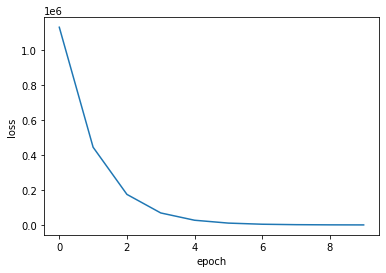

In [ ]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')

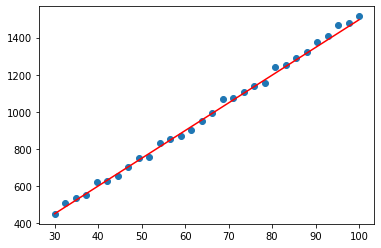

In [ ]:
with torch.no_grad():
    y_hat = linear_model(x)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')